In [1]:
### Welcome to your last coding session!
# Today we're going to learn how to do something quite vital - input and output, or
# reading texts in to analyze, and then writing them back out to save them.

# This is a big step forward! Before, we were just working on practice sample texts within the Python interpreter
# Starting today, we'll be importing actual real literary texts and working on them.


In [2]:
# Filepath; this will be different for you of course! Set it right

filepath = 'DATA_LESSON_4/TEXTS/'

In [3]:
# So we have a filepath to where our files are; let's see what's in there!

# PS: "folder" and "directory" are synonymous in Python speak

import os 
os.listdir(filepath)

['MOBY_DICK.txt', 'ULYSSES.txt']

In [4]:
# More complicated

from os import listdir
from os.path import isfile, join

# Let's use list comprehension, cool trick that combines for and if statements into a SINGLE LINE
files = [f for f in listdir(filepath) if isfile(join(filepath, f))]
print(files)

['MOBY_DICK.txt', 'ULYSSES.txt']


In [5]:
# NOTE DS STORE! REMOVE IT!

#del files[0]
files

['MOBY_DICK.txt', 'ULYSSES.txt']

In [6]:
dummy = ['DS.store', 'ULYSSES.txt', 'MOBY_DICK.txt']

dummy2 = []

for d in dummy:
    if d != 'DS.store':
        dummy2.append(d)
        
del dummy[0]

dummy

['ULYSSES.txt', 'MOBY_DICK.txt']

In [7]:
# More comprehensive

import glob
print(glob.glob(filepath + "*.txt"))

globfiles = (glob.glob(filepath + "*.txt"))
# globfiles

# with open(globfiles[0], 'r', encoding='utf-8') as text:
#     print(text.read())

['DATA_LESSON_4/TEXTS\\MOBY_DICK.txt', 'DATA_LESSON_4/TEXTS\\ULYSSES.txt']


In [8]:
# OK next let's read in actual text files into Python!
# First let's just do one

import codecs # this is a handy package that will smooth out a lot of the kinks in reading texts into Python

text = codecs.open(filepath + 'MOBY_DICK.txt', "r", encoding='utf8') # Note the syntax, the "r" is key 
# and it means "read"
# Important note that the file is called MOBY_DICK but we have to read in MOBY_DICK.txt
raw = text.read()

print(raw[0:100]) # Don't read in the full text, it's too big! SANITY CHECK MAKE SURE IT WORKS

  The pale Usher—threadbare ive Usher to a Grammar School.)


In [9]:
files, filepath

(['MOBY_DICK.txt', 'ULYSSES.txt'], 'DATA_LESSON_4/TEXTS/')

In [10]:
files2 = []

for f in files:
    want = filepath + f
    files2.append(want)

In [11]:
files2

['DATA_LESSON_4/TEXTS/MOBY_DICK.txt', 'DATA_LESSON_4/TEXTS/ULYSSES.txt']

In [12]:
# OK you get the idea
# Now let's do stuff to the texts

files3 = []

for file in files2:
    text = codecs.open(file, "r", encoding='utf8')
    raw = text.read()
    # let's lower case everything
    raw1 = raw.lower()
    # And let's split it into list of strings/words
    raw2 = raw1.split(" ")
    files3.append(raw2)

In [13]:
# Sanity check, always check!

len(files3), len(files3[0]), files3[0][0:20]

(2,
 214729,
 ['\ufeffetymology.\r(supplied',
  'by',
  'a',
  'late',
  'consumptive',
  'usher',
  'to',
  'a',
  'grammar',
  'school.)\r',
  '',
  'the',
  'pale',
  'usher—threadbare',
  'in',
  'coat,',
  'heart,',
  'body,',
  'and',
  'brain;'])

In [14]:
# Let's do some simple text analytics - counting!

from collections import Counter

# Really powerful and useful module/package


In [15]:
# Simple application!

texts_counts = []

for text in files3:
    counts = Counter(text)
    texts_counts.append(counts)

In [16]:
# What is this thing?

type(texts_counts[0]) # It's a Counter object which is basically a dictionary!
# Dictionaries, a new datatype!

collections.Counter

In [17]:
# What's in there

#texts_counts[0], texts_counts[1]

texts_counts[0]

Counter({'the': 14204,
         'of': 6538,
         'and': 6236,
         'a': 4590,
         'to': 4512,
         'in': 4047,
         '': 3116,
         'that': 2732,
         'his': 2483,
         'it': 1762,
         'i': 1720,
         'as': 1704,
         'with': 1702,
         'he': 1677,
         'but': 1662,
         'was': 1574,
         'is': 1568,
         'for': 1526,
         'all': 1341,
         'at': 1295,
         'this': 1229,
         'by': 1149,
         'from': 1084,
         'not': 1063,
         'be': 984,
         'on': 951,
         'so': 877,
         'one': 777,
         'you': 767,
         'had': 762,
         'have': 753,
         'or': 693,
         'were': 649,
         'they': 639,
         'their': 619,
         'some': 605,
         'an': 588,
         'my': 574,
         'are': 572,
         'like': 564,
         'which': 557,
         'upon': 556,
         'him': 554,
         'when': 548,
         'whale': 526,
         'into': 519,
         'now

In [18]:
len(texts_counts)

2

In [19]:
# First let's parse the information in this datastructure
# What are the most common words?

texts_counts[0].most_common(5), texts_counts[1].most_common(5)

([('the', 14204), ('of', 6538), ('and', 6236), ('a', 4590), ('to', 4512)],
 [('the', 14522), ('of', 8039), ('', 7689), ('and', 6881), ('a', 6312)])

In [20]:
# Iterate through all the texts, report back top 10 for each

for text in texts_counts:
    print(text.most_common(10))

[('the', 14204), ('of', 6538), ('and', 6236), ('a', 4590), ('to', 4512), ('in', 4047), ('', 3116), ('that', 2732), ('his', 2483), ('it', 1762)]
[('the', 14522), ('of', 8039), ('', 7689), ('and', 6881), ('a', 6312), ('to', 4798), ('in', 4698), ('he', 3581), ('his', 3259), ('with', 2417)]


In [21]:
# OK last thing; OUTPUT! Writing files to folder

# You first need to create a folder to store the output; then change the filepath to write out
filepath2 = 'DATA_LESSON_4/TEXTS_OUT/'

keep = [word for word in files3[0] if word == 'the']

keep1 = " ".join(keep)
with open(filepath2 + "MOBY_DICK_THE_ONLY_CRAZY.txt" , 'w') as output: # 'w' parameter, it means "write"
    output.write(keep1) # it will only write out STRINGS; for LISTS or other datatypes, you need something else

In [22]:
### LAST CODING SET! Attempt in class - ungraded

In [23]:
# 1

# In the data I gave you, there is a copy of Great Expectations called GREAT_EXPECT
# Read that text into Python and replicate the pipeline we have just done above, starting from
# reading in the text file with codecs

filepath = "DATA_LESSON_4\\GREAT_EXPECT.txt"
# filepath = os.path.join(filepath, os.listdir(filepath)[0])
# print(filepath)
raw = codecs.open(filepath, "r", encoding="utf-8").read()
raw[0:100]

"\ufeff  \rChapter I\rMy father's family name being Pirrip, and my Christian name Philip, my infant tongue c"

In [24]:
# 2

# Identify a text you find interesting that you can get a free text version online, like Middlemarch
# Figure out how to turn that online text into a txt file and save it in our folder. Label it accordingly.
# Tip: cut and paste the online text into a WORD file, and then SAVE IT AS A TXT FILE and CHOOSE UTF-8
# ENCODING when prompted.

# Then, replicate the above pipeline once more
# BUT WITH THE FOLLOWING CHANGE: instead of getting the top 10 most common words, identify
# the TOP TEN LEAST COMMON WORDS 

filepath = "DATA_LESSON_4"
filepath = os.path.join(filepath, os.listdir(filepath)[1])
raw = codecs.open(filepath, "r", encoding="utf-8").read()
raw = raw.split(" ")
ans = Counter(raw).most_common(len(raw))[-11:-1]
ans

[('main', 1),
 ('PG', 1),
 ('search\r\nfacility:', 1),
 ('www.gutenberg.org.\r\n\r\nThis', 1),
 ('includes', 1),
 ('Gutenberg™,\r\nincluding', 1),
 ('eBooks,', 1),
 ('to\r\nsubscribe', 1),
 ('email', 1),
 ('newsletter', 1)]

In [45]:
ans = [(key.replace('\r\n', ''), count) for key, count in ans]

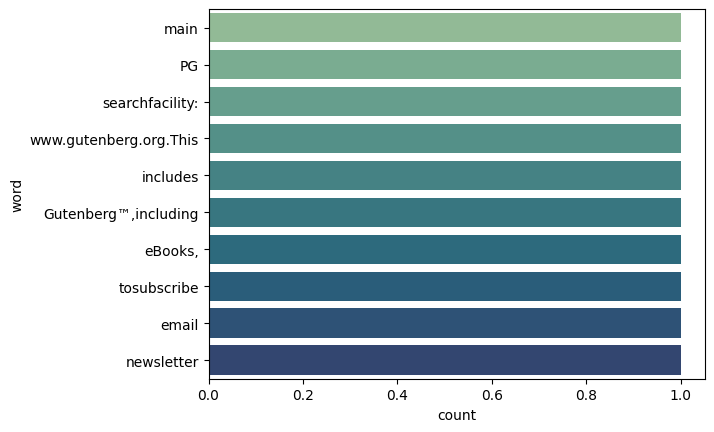

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(ans)
df.columns = ['word', 'count']
sns.barplot(df, y='word', x = 'count', hue = 'word', palette='crest')
plt.show()

In [26]:
# 3 HARD!

# For all the text files in your TEXTS folder (Moby Dick, Ulysses, Great Expectations, and your text of choice if
# you were able to figure out problem #2; otherwise, no worries, just use the first 3), figure out how to
# write a FOR LOOP to write out files to your TEXTS_OUT folder, rather than do them one by one, as we do above.
filepath = "DATA_LESSON_4"
files = []
for f in os.listdir(filepath):
    if ".txt" in f:
        files.append(os.path.join(filepath, f))


# Specifically, WRITE OUT THE ENTIRE TEXT, NOT JUST THE WORD "THE," TO TEXTS_OUT folder, to make sure
# you've written the code right.

for f in files:
    with open(f, "r", encoding="utf-8") as txt:
        raw = txt.read()
        helper = f.split("\\")
        new_path = os.path.join(helper[0], "TEXTS_OUT")
        new_path = os.path.join(new_path, helper[1].replace(".txt", "") + "_NEW.txt")
        with open(new_path, "w", encoding="utf-8") as other_txt:
            other_txt.write(raw)

# One tricky thing is saving the files with a new FILE NAME. You can save them with whatever name but extra
# points if you can figure out how to save them with different file names of your choice. So for example,
# you will save a file called MOBY_DICK_NEW to TEXTS_OUT folder.

# To show you've done this problem correctly, show us your code AND run the 
# os.listdir(filepath)
# command to show us what is in your TEXTS_OUT folder. filepath here should point to that folder.
os.listdir(filepath + "/TEXTS_OUT")

['GREAT_EXPECT_NEW.txt',
 'little women_NEW.txt',
 'MOBY_DICK_THE_ONLY_CRAZY.txt',
 'SENSE_AUSTEN_NEW.txt']